In [2]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Load sessions

In [3]:
ID = 148
path = '/Volumes/freeman/Nick/mVR/sessions'

logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_behavior_log.xlsx'
log = pd.read_excel(logpath)



148 run on antibiasR, R is correct, L is incorrect

In [4]:
sessions = log[(log.AnimalNum == 148)]
unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasR = sessions[(sessions.SessionType == 'antibiasR')]
sessions = (pd.concat([unbiased,antibiasR])).sort()
session_vals= [int(x) for x in sessions.SessionNum]
print sessions

    AnimalNum  SessionNum SessionType
13        148          56    unbiased
14        148          60    unbiased
15        148          71   antibiasR
16        148          75   antibiasR
17        148          79   antibiasR
18        148          83    unbiased
19        148          86    unbiased


In [5]:
summary = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals]

In [6]:
mean_trials = np.mean([(len(x))for x in summary])

In [7]:
unbiased_idx = [0,1,5,6]
antibias_idx = [2,3,4]
len(summary[0])

64

In [8]:
summary = [mvr.correctL(x) for x in summary]

# Create dot plot

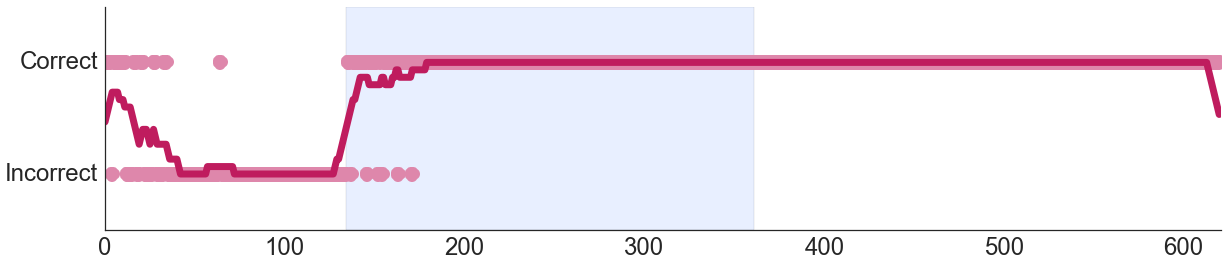

In [45]:
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.',color=[0.87,0.53,0.67], markersize=30)
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
#[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = [0.7,0.8,1.0], alpha = 0.3)
plt.xlabel('Cumulative Trial #',fontsize = 18.0)
plt.yticks([0,1],['Incorrect','Correct'], fontsize = 24.0)
plt.xticks(fontsize=24.0)
plt.title('Multi-Session Performance - Animal 148', fontsize = 18.0)
sns.despine()

avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs, color=[0.75,0.11,0.37],linewidth=7) 
plt.savefig('148plot.eps', format='eps')

621 621


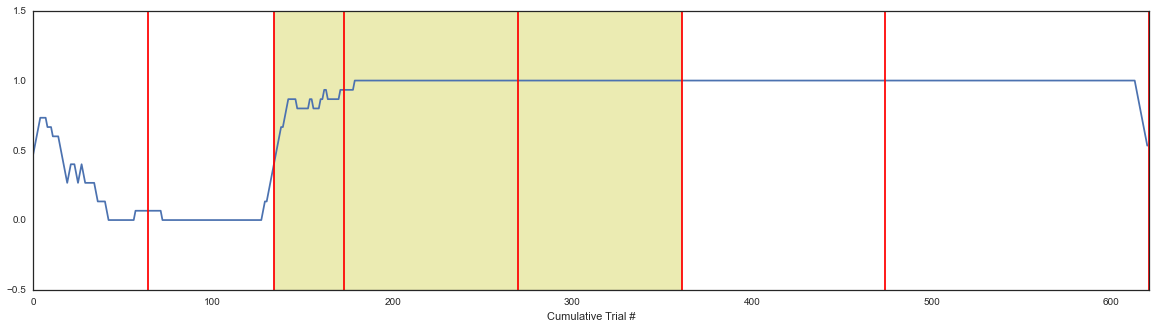

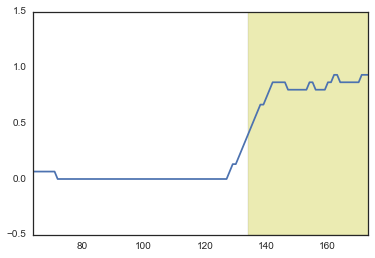

In [10]:
#Moving Average-Main Behavior
plt.figure(figsize = [20,5])
avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')

print len(avgs), len(dot_array)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')

plt.figure(2)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(len_array[0],len_array[2])
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)

zoom = avgs[len_array[1]-40:len_array[1]+40]
zoom  = pd.Series(zoom)
zoom.to_csv(path + "/rollingavg148.csv")


In [ ]:
#Plot Unbiased Correct (R correct, L incorrect)
c = [] #correct/right
for j in unbiased_idx:
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/left side

labels = ('Day 1', 'Day 2', 'Day 3', 'Day 4')  #Unbiased days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Right)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Left)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('Before <----- Unbiased Sessions -----> After')
plt.ylabel('Percent Correct')
plt.title('Unbiased Maze Choices')
plt.show()
plt.savefig(path+'/unbiased148')

# Plot Animal performance

In [ ]:
#Plot Unbiased Correct (R correct, L incorrect)
c = [] #correct/right
for j in range(7):
    
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/left side

labels = ['UB1', 'UB2', 'ABR1', 'ABR2', 'ABR3', 'UB3', 'UB4']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Right)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Left)')

plt.legend(loc='best')
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(1.9,4.8, facecolor = 'y', alpha = 0.3)
plt.show()

#plt.savefig(path+'/allsessions148.png')

mu_perc_corrUB_before = np.mean(c[0:2])
mu_perc_corrAB = np.mean(c[2:5])
mu_perc_corrUB_after = np.mean(c[5:7])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrUB_after

# Time stats

In [ ]:
#Mean Time per trial
mu_time = []
std_time = []

[mu_time.append(x.time.mean()) for x in summary]
[std_time.append(x.time.std()) for x in summary]
print mu_time

plt.bar(range(0,len(mu_time)), mu_time, align = "center", yerr = std_time)
labels = ['UB1', 'UB2', 'ABR1', 'ABR2', 'ABR3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time per Trial (s)')

plt.figure(2)
t,t1= [],[]
[t.append(x.time) for x in summary]

plt.hist(t,8, facecolor = 'g')
plt.title('Time per Trial')
plt.xlabel('Time (s)')

            

In [ ]:
mu_choice = []
std_choice = []

[mu_choice.append(x.timeChoice.mean()) for x in summary]
[std_choice.append(x.timeChoice.std()) for x in summary]
print mu_choice
print std_choice

plt.bar(range(0,len(mu_choice)), mu_choice, align = "center", yerr = std_choice)
labels = ['UB1', 'UB2', 'ABR1', 'ABR2', 'ABR3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time at Choice Point(s)')

plt.figure(2)
choice = []
[choice.append(x.timeChoice) for x in summary]

plt.hist(choice,8, facecolor = 'g')
plt.title('Time per Choice Point')
plt.xlabel('Time (s)')
            

In [ ]:
#Plot Choice Time acros all sessions
plt.figure(figsize = [20,5])

tchoice_array = []
len_array = []
for a in range(len(summary)):
    tchoice_array += list(summary[a].timeChoice)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
#plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Time at Choice Point')

In [ ]:
#Plot Trial Time acros all sessions
plt.figure(figsize = [20,5])

time_array = []
len_array = []
for a in range(len(summary)):
    time_array += list(summary[a].time)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')

plt.title('Multi-Session Time per Trial')

In [ ]:
#Subplot
plt.figure(figsize = [20,5])
plt.subplot(211)
plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
[plt.axvline(x =a, color='r') for a in len_array]
#plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')


plt.subplot(212)
plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')


In [ ]:
completion  = []
for b in range(len(summary)):
    completion += list(summary[b].Completed)
    
plt.figure(figsize = [20,5])
plt.plot(completion,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Incompletion')
num_incomplete = completion.count(0)
print num_incomplete


In [ ]:
num_deadend = 0
for b in antibias_idx:
    num_deadend += list(summary[b].deadEnd).count(1)
    
print num_deadend

In [ ]:
len(summary)

In [ ]:
for i in antibias_idx:
    plt.hist(summary[i].timeChoice[~np.isnan(summary[i].timeChoice)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Choicepoint Time Distribution') 
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].initChoiceTime[~np.isnan(summary[i].initChoiceTime)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Initial Choicepoint Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].time[~np.isnan(summary[i].time)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Trial Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 




In [ ]:
for i in antibias_idx:
    plt.hist(summary[i].choicePath[~np.isnan(summary[i].choicePath)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Choicepoint Path Distribution') 
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].initChoicePath[~np.isnan(summary[i].initChoicePath)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Initial Choicepoint Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].Pathlengths[~np.isnan(summary[i].Pathlengths)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

In [ ]:
plt.figure(figsize = [20,5])

initpath = []
for i in range(len(summary)):
    initpath = np.append(initpath,summary[i].initChoicePath)

pathavgs = []
binsize = 20
kernel = np.ones(binsize,)/float(binsize)
pathavgs = np.convolve(initpath,kernel, 'same')
   
plt.plot(initpath,'.')
[plt.axvline(x =a, color='r') for a in len_array ]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('TrialNum')
plt.ylabel('Path Length')
plt.title('Initial Choicepoint Path Length-')
plt.plot(pathavgs,'-',linewidth = 2)
    

In [ ]:
antibias_idphi = []
ab_array = []
print type(summary[2].IdPhi.values)
for i in antibias_idx:
    antibias_idphi = np.append(antibias_idphi,summary[i].IdPhi.values)
    ab_array.append(len(summary[i]))

print len(antibias_idphi)
zidphi_3days = ((antibias_idphi - np.nanmean(antibias_idphi))/float(np.nanstd(antibias_idphi)))
print ab_array
print "mean = "+str(np.nanmean(antibias_idphi))
print "std= " + str(np.nanstd(antibias_idphi))
print "median= " + str(np.nanmedian(antibias_idphi))
    
ab_array = list(np.cumsum(ab_array))

plt.plot(zidphi_3days)
plt.xlim(0,max(ab_array))
[plt.axvline(x =a, color='r') for a in ab_array ]
plt.axhline(y=np.nanmedian(antibias_idphi),color = 'k')
plt.yticks([np.nanmedian(antibias_idphi)],['Median Idphi'])
plt.title('Antibias zIdPhi')

plt.figure()
plt.plot(antibias_idphi)
plt.xlim(0,max(ab_array))
[plt.axvline(x =a, color='r') for a in ab_array ]
plt.title('Antibias IdPhi')


In [ ]:
print antibias_idx[::-1]
color = ['b','g','r']
for i in antibias_idx:
    plt.hist(summary[i].zIdPhi,50,color = color[i-2])
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.axvline(x=0,color = 'k')
plt.title('Antibias zIdPhi Distribution')
#plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].IdPhi,50,color = color[i-2])
plt.title('Antibias IdPhi Distribution')
plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])

In [ ]:
all_idphi = []
all_zidphi = []
for i in range(len(summary)):
    all_idphi = np.append(all_idphi,summary[i].IdPhi.values) 
    
all_zidphi = ((all_idphi - np.nanmean(all_idphi))/float(np.nanstd(all_idphi)))

plt.figure(figsize = [20,5])
plt.plot(all_idphi)
[plt.axvline(x =a, color='r') for a in len_array ]

plt.figure(figsize = [20,5])
plt.plot(all_zidphi)
[plt.axvline(x =a, color='r') for a in len_array ]
        
    

In [ ]:
#Summary vals for all of an animal's sessions
animal_summary = {'Animal' :148,
                  'totalDeadEnd': num_deadend, 
                  'incomplete': num_incomplete, 
                  'meanNumTrials' : mean_trials,
                  'meanTime' : np.mean(time_array),
                  'meanChoiceTime': np.nanmean(tchoice_array),
                  'meanIdPhi': np.nanmean(all_idphi),
                  'stdIdPhi' : np.nanstd(all_idphi),
                  'meanAntibiasIdPhi' : np.nanmean(antibias_idphi),
                  'stdAntibiasIdPhi' : np.nanstd(antibias_idphi),
                  'meanzIdPhi' : np.nanmean(all_zidphi),
                  'stdzIdPhi': np.nanstd(all_zidphi),
                  'meanAntibiaszIdphi' : np.nanmean(zidphi_3days),
                  'meanAntibiaszIdPhi' : np.nanstd(zidphi_3days),
                  'medianIdPhi' : np.median(all_idphi),
                  'medianzIdPhi' : np.median(all_zidphi),
                  'numDays': len(summary),
                  'correctBefore': mu_perc_corrUB_before,
                  'correctAntibias': mu_perc_corrAB,
                  'correctAfter' : mu_perc_corrUB_after}

In [ ]:
animal_summary = pd.Series(animal_summary)


In [ ]:
#animal_summary = pd.DataFrame.from_dict(animal_summary,orient = 'index')

In [ ]:
animal_summary.to_csv( path + "/animalsummary148.csv")

In [ ]:
animal_summary


# Add pro-bias session analysis

In [ ]:
logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_extraswitch_log.xlsx'
extralog = pd.read_excel(logpath)
extralog

extra_sessions = extralog[(extralog.AnimalNum == 148)]
antibiasL = extra_sessions[(extra_sessions.SessionType == 'antibiasL')]
sessions = (pd.concat([unbiased,antibiasR,antibiasL])).sort(columns = 'SessionNum')
session_vals= [int(x) for x in sessions.SessionNum]
print sessions
print session_vals

In [ ]:
summary_extra = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals[-2:]]

summary_extra = [mvr.correctR(x) for x in summary_extra]
summary+=summary_extra

In [ ]:
#Plot Correct Track Record acros all sessions (main behavior)
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[6],len_array[8], facecolor = 'g', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Track Record')


avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs) 